# ELG7186 - Fall 2022 - Assignment 3
## Due: <strong>Wednesday Nov. 23<sup>st</sup> 2022 -- 11:59pm</strong>

### DO NOT submit any images from the dataset

In [ ]:
import tensorflow as tf
print(len(tf.config.list_physical_devices('GPU')))
import torch
print(torch.cuda.is_available())

1
True


In [ ]:

!pip install visualkeras

In [ ]:
!pip install livelossplot

In [ ]:
!pip install split-folders

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.imagenet_utils import preprocess_input
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from keras.layers import BatchNormalization
import splitfolders
from sklearn.metrics import classification_report
from keras import optimizers
from sklearn.metrics import mean_squared_error
from livelossplot.inputs.keras import PlotLossesCallback
import visualkeras

## Part 1a. Transfer Learning - Classification Network
using the Keras implementation of VGG-16 as a starting point.

Using the first 2 blocks of VGG-16 add extra Keras layers to create your own version of a CNN network for the classification of the images according to the number of leaves in the plant images. Note that there will be 5 classes. The last layer from VGG-16 will be block2 pool and you are allowed to add no more than five fully connected or convolutional layers to the network including the final output layer.

- Plot a loss curve for training and validation data
- Plot an accuracy curve for training and validation data
- Provide confusion matrix of your network on the training including validation and testing data sets.


####Read data and split

In [ ]:
splitfolders.ratio('C:/Users/user/PycharmProjects/CV_Assigment3/training/training',
                   output="C:/Users/user/PycharmProjects/CV_Assigment3/cv3",
                   seed=0,
                   ratio=(0.8,0.2),
                   group_prefix=None,
                   move=False
                   )

In [ ]:
train_path="C:/Users/user/PycharmProjects/CV_Assigment3/cv3/train"
validate_path="C:/Users/user/PycharmProjects/CV_Assigment3/cv3/val"
test_path="C:/Users/user/PycharmProjects/CV_Assigment3/testing/testing"



*   Training



In [ ]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_path,
  image_size=(128,128),color_mode='rgb',
  batch_size=32,
seed =123,shuffle=True)


Found 720 files belonging to 5 classes.


In [ ]:
X_train = np.concatenate([x for x, y in train_data], axis=0)
y_train = np.concatenate([y for x, y in train_data], axis=0)

In [ ]:
X_train/=255.0

In [ ]:
X_train

array([[[[0.2374587 , 0.32765478, 0.39824304],
         [0.3317345 , 0.42193058, 0.4925188 ],
         [0.2706838 , 0.3723229 , 0.43909678],
         ...,
         [0.3878998 , 0.53711414, 0.61155903],
         [0.37347603, 0.5238034 , 0.59787726],
         [0.38126168, 0.52840775, 0.60860306]],

        [[0.2531797 , 0.33553264, 0.40860248],
         [0.302999  , 0.39319506, 0.4637833 ],
         [0.27113318, 0.37067142, 0.4381456 ],
         ...,
         [0.45914948, 0.6042475 , 0.6787573 ],
         [0.42359367, 0.56751615, 0.6426137 ],
         [0.40423056, 0.5459502 , 0.6278672 ]],

        [[0.17608835, 0.25844127, 0.32510796],
         [0.20825243, 0.2984485 , 0.36140805],
         [0.25481233, 0.3450084 , 0.41538805],
         ...,
         [0.37786752, 0.52296555, 0.59747535],
         [0.42501968, 0.56371456, 0.6414259 ],
         [0.42733788, 0.5645928 , 0.6477729 ]],

        ...,

        [[0.4688011 , 0.58553344, 0.6655769 ],
         [0.48737523, 0.5971792 , 0.6795321 ]

In [ ]:
X_train[5].shape

(128, 128, 3)

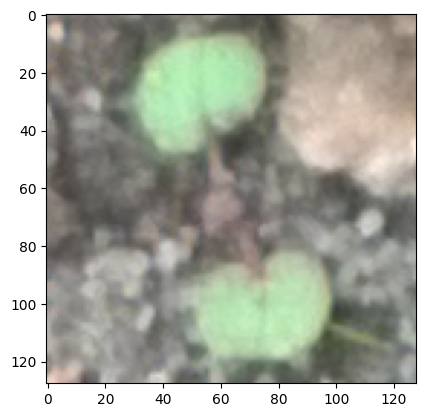

In [ ]:
plt.imshow(X_train[5])

*   Validation

In [ ]:
validate_data = tf.keras.preprocessing.image_dataset_from_directory(validate_path,
  image_size=(128, 128),color_mode='rgb',
  batch_size=32,
seed=123,shuffle=True)

Found 180 files belonging to 5 classes.


In [ ]:
validate_data

<BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
X_valid = np.concatenate([x for x, y in validate_data], axis=0)
y_valid = np.concatenate([y for x, y in validate_data], axis=0)

In [ ]:
X_valid/=255.0

In [ ]:
X_valid

array([[[[0.2178006 , 0.20300275, 0.13241452],
         [0.19333622, 0.181434  , 0.12245729],
         [0.16891672, 0.1475313 , 0.09664283],
         ...,
         [0.4511654 , 0.4041066 , 0.31783208],
         [0.476332  , 0.4292732 , 0.34299868],
         [0.4457721 , 0.3987133 , 0.3124388 ]],

        [[0.20280278, 0.19505155, 0.12242593],
         [0.17749532, 0.17665225, 0.11465831],
         [0.1613709 , 0.14216135, 0.09121159],
         ...,
         [0.45486414, 0.40780532, 0.32153082],
         [0.50638896, 0.4593301 , 0.3730556 ],
         [0.4881252 , 0.44106635, 0.35479185]],

        [[0.19774847, 0.16753983, 0.10272671],
         [0.17026924, 0.14016724, 0.084056  ],
         [0.1571015 , 0.11917108, 0.0663065 ],
         ...,
         [0.42105228, 0.37399346, 0.28771895],
         [0.4257335 , 0.3767905 , 0.29616854],
         [0.43033627, 0.38327745, 0.29700294]],

        ...,

        [[0.46181035, 0.43040717, 0.36179504],
         [0.44633976, 0.41888878, 0.34830052]

*   Testing

In [ ]:
test_data = tf.keras.utils.image_dataset_from_directory(test_path,
    shuffle=True,color_mode='rgb',
    image_size=(128, 128),
    batch_size=32,seed=42)

Found 100 files belonging to 5 classes.


In [ ]:
X_test = np.concatenate([x for x, y in test_data], axis=0)
y_test = np.concatenate([y for x, y in test_data], axis=0)

In [ ]:
X_test/=255.0

### Step 1

In [ ]:
plot_loss_1 = PlotLossesCallback()
input_shape = (128, 128, 3)
optim_1 = tf.keras.optimizers.Adam(learning_rate=0.001)
n_classes=5

In [ ]:
vgg_model = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=input_shape)

for layer in vgg_model.layers:
    layer.trainable = False

In [ ]:
#Using the first 2 blocks of VGG-16
Block2_gg16=vgg_model.layers[6].output
Block2_gg16

<KerasTensor: shape=(None, 32, 32, 128) dtype=float32 (created by layer 'block2_pool')>

In [ ]:
vgg_model_transfer = vgg_model.layers[6].output
#layer1
vgg_model_transfer= Conv2D(512, kernel_size=5, activation='relu', padding='same')(vgg_model_transfer)
vgg_model_transfer= MaxPooling2D(pool_size=(2, 2))(vgg_model_transfer)
#layer2
vgg_model_transfer= Conv2D(256, kernel_size=2, activation='relu', padding='same')(vgg_model_transfer)
vgg_model_transfer= MaxPooling2D(pool_size=(2, 2))(vgg_model_transfer)
#layer3
vgg_model_transfer= Conv2D(128, kernel_size=2, activation='relu', padding='same')(vgg_model_transfer)
vgg_model_transfer= MaxPooling2D(pool_size=(2, 2))(vgg_model_transfer)
#layer4
vgg_model_transfer= Conv2D(64, kernel_size=3, activation='relu', padding='same')(vgg_model_transfer)
vgg_model_transfer= MaxPooling2D(pool_size=(2, 2))(vgg_model_transfer)

In [ ]:
vgg_model_transfer = Flatten(name="flatten")(vgg_model_transfer)
vgg_model_transfer = Dense(64, activation='relu')(vgg_model_transfer)
vgg_model_transfer = Dense(32, activation='relu')(vgg_model_transfer)
output_layer = Dense(5, activation='softmax')(vgg_model_transfer)

In [ ]:
cls_vgg16 = Model(inputs=vgg_model.input, outputs=output_layer)

In [ ]:
cls_vgg16.compile(loss='sparse_categorical_crossentropy',  optimizer=optim_1,metrics=['accuracy'])

In [ ]:
cls_vgg16_history = cls_vgg16.fit(train_data, epochs=100,batch_size=64, verbose=1,validation_data=(validate_data))

Epoch 1/100
23/23 [==============================] - 4s 98ms/step - loss: 435.8131 - accuracy: 0.2028 - val_loss: 88.5715 - val_accuracy: 0.2056
Epoch 2/100
23/23 [==============================] - 2s 79ms/step - loss: 39.1294 - accuracy: 0.2014 - val_loss: 10.4183 - val_accuracy: 0.2389
Epoch 3/100
23/23 [==============================] - 2s 79ms/step - loss: 6.2658 - accuracy: 0.2292 - val_loss: 4.1284 - val_accuracy: 0.2111
Epoch 4/100
23/23 [==============================] - 2s 79ms/step - loss: 2.5799 - accuracy: 0.2681 - val_loss: 2.2939 - val_accuracy: 0.2778
Epoch 5/100
23/23 [==============================] - 2s 79ms/step - loss: 1.6953 - accuracy: 0.3417 - val_loss: 1.8826 - val_accuracy: 0.3444
Epoch 6/100
23/23 [==============================] - 2s 79ms/step - loss: 1.3780 - accuracy: 0.4153 - val_loss: 1.8633 - val_accuracy: 0.3278
Epoch 7/100
23/23 [==============================] - 2s 79ms/step - loss: 1.1664 - accuracy: 0.5333 - val_loss: 1.7919 - val_accuracy: 0.3000
E

In [ ]:
cls_vgg16.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

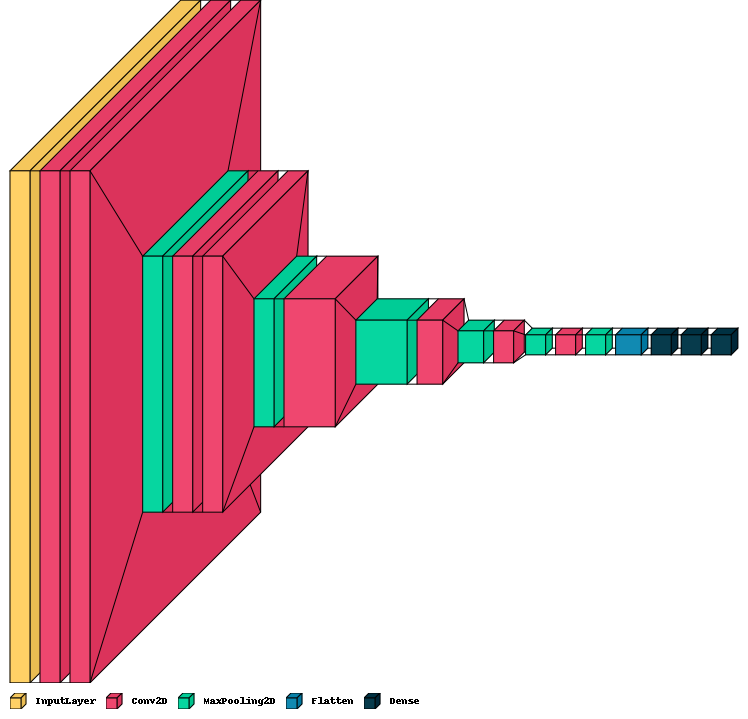

In [ ]:
visualkeras.layered_view(cls_vgg16,legend=True, draw_volume=True)

##### Train Predictions





###### Model Loss and Accuracy

In [ ]:
cls_vgg16_score = cls_vgg16.evaluate(X_train,y_train)
print('Loss: %.2f' % (cls_vgg16_score[0]))
print('Accuracy: %.2f' % (cls_vgg16_score[1] * 100))



4/4 [==============================] - 1s 30ms/step - loss: 3.7135 - accuracy: 0.3400
Loss: 3.71
Accuracy: 34.00


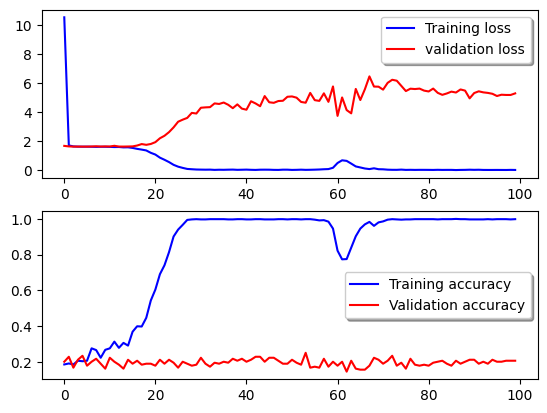

In [ ]:
fig, ax = plt.subplots(2,1)
ax[0].plot(cls_vgg16_history.history['loss'], color='b', label="Training loss")
ax[0].plot(cls_vgg16_history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(cls_vgg16_history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(cls_vgg16_history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [ ]:
clf_score_tr = cls_vgg16.evaluate(train_data)
print('Training Loss: %.2f' % (clf_score_tr[0]))
print('Training Accuracy: %.2f' % (clf_score_tr[1] * 100))

23/23 [==============================] - 1s 39ms/step - loss: 9.8785e-04 - accuracy: 1.0000
Training Loss: 0.00
Training Accuracy: 100.00


In [ ]:
cls_score_tst = cls_vgg16.evaluate(X_test)
print('Validation Loss: %.2f' % (cls_score_tst[0]))
print('Validation Accuracy: %.2f' % (cls_score_tst[1] * 100))

4/4 [==============================] - 0s 30ms/step - loss: 3.7133 - accuracy: 0.3400
Validation Loss: 3.71
Validation Accuracy: 34.00


###### Training

In [ ]:
cls_vgg16_tr_preds = cls_vgg16.predict(X_train)
cls_vgg16_train_classes = np.argmax(cls_vgg16_tr_preds, axis=1)
#cls_vgg16_train_classes

23/23 [==============================] - 1s 39ms/step


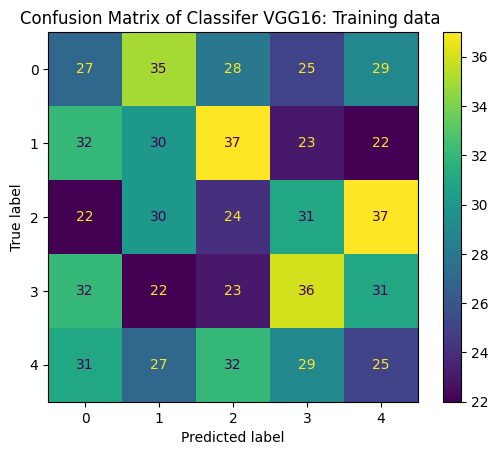

In [ ]:
cm_cls_train = confusion_matrix(y_train, cls_vgg16_train_classes)
display = ConfusionMatrixDisplay(cm_cls_train).plot()
plt.title("Confusion Matrix of Classifer VGG16: Training data ")
plt.show()

In [ ]:
cls_score_tr = cls_vgg16.evaluate(X_train,y_train)
print('Training Loss: %.2f' % (cls_score_tr[0]))
print('Training Accuracy: %.2f' % (cls_score_tr[1] * 100))

23/23 [==============================] - 1s 40ms/step - loss: 9.8790e-04 - accuracy: 1.0000
Training Loss: 0.00
Training Accuracy: 100.00


######Validation

In [ ]:
vgg_val_preds = cls_vgg16.predict(X_valid)
vgg_val_classes = np.argmax(vgg_val_preds, axis=1)
#vgg_val_classes

6/6 [==============================] - 1s 112ms/step


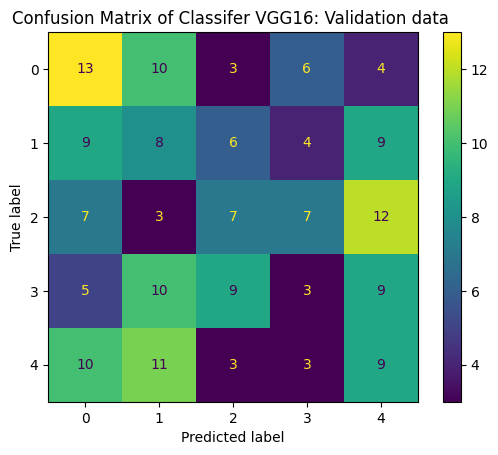

In [ ]:
cm_regu_val = confusion_matrix(y_valid, vgg_val_classes)
display = ConfusionMatrixDisplay(cm_regu_val).plot()
plt.title("Confusion Matrix of Classifer VGG16: Validation data ")
plt.show()

In [ ]:
cls_score_val = cls_vgg16.evaluate(X_train,y_valid)
print('Validation Loss: %.2f' % (cls_score_val[0]))
print('Validation Accuracy: %.2f' % (cls_score_val[1] * 100))

6/6 [==============================] - 1s 38ms/step - loss: 3.5327 - accuracy: 0.3389
Validation Loss: 3.53
Validation Accuracy: 33.89


###### Testing

In [ ]:
vgg_preds = cls_vgg16.predict(X_test)
vgg_pred_classes = np.argmax(vgg_preds, axis=1)
#vgg_pred_classes

4/4 [==============================] - 0s 123ms/step


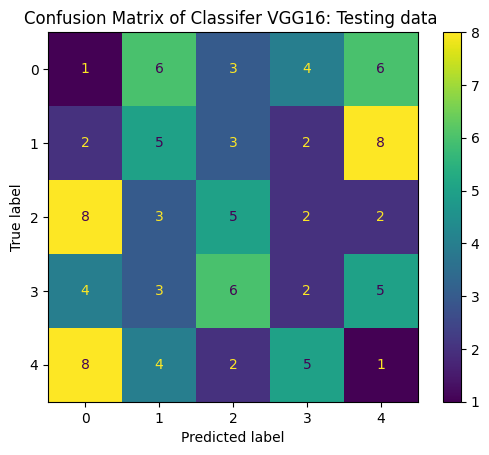

In [ ]:
cm_regu_test = confusion_matrix(y_test, vgg_pred_classes)
display = ConfusionMatrixDisplay(cm_regu_test).plot()
plt.title("Confusion Matrix of Classifer VGG16: Testing data ")
plt.show()

In [ ]:
cls_score_tst = cls_vgg16.evaluate(X_test,y_test)
print('Testing Loss: %.2f' % (cls_score_tst[0]))
print('Testing Accuracy: %.2f' % (cls_score_tst[1] * 100))

4/4 [==============================] - 0s 30ms/step - loss: 3.7133 - accuracy: 0.3400
Testing Loss: 3.71
Testing Accuracy: 34.00


## Part 1b. Transfer Learning - Regression Reformulation 

### Step 1 


- Plot a loss curve for training and validation data
- Plot an accuracy curve for training and validation data
- Provide confusion matrix of your network on the training including validation and testing data sets.

### Step 2
The size of the training data is quite small. Discuss based on your learning curves if overfitting is occurring with the models from Parts 1a and 1b.

In [ ]:
#Write your code here

###Step 1

#### Regression

In [ ]:
VGG_Reg =VGG16(
    include_top=False, weights='imagenet',
    input_shape=(128,128,3),classifier_activation="linear"
)

In [ ]:
for layer in VGG_Reg.layers:
    layer.trainable = False

In [ ]:
vgg_model_reg = VGG_Reg.layers[6].output

# Block 1
vgg_model_reg= Conv2D(512, kernel_size=5, activation='relu', padding='same')(vgg_model_reg)
vgg_model_reg= MaxPooling2D(pool_size=(2,2))(vgg_model_reg)
# Block 1
vgg_model_reg= Conv2D(256, kernel_size=3, activation='relu', padding='same')(vgg_model_reg)
vgg_model_reg= MaxPooling2D(pool_size=(2,2))(vgg_model_reg)
# Block 1
vgg_model_reg= Conv2D(128, kernel_size=3, activation='relu', padding='same')(vgg_model_reg)
vgg_model_reg= MaxPooling2D(pool_size=(2,2))(vgg_model_reg)


In [ ]:
vgg_model_reg = Flatten(name="flatten")(vgg_model_reg)
vgg_model_reg = Dense(128, activation='relu')(vgg_model_reg)
reg_output_layer = Dense(1, activation='linear')(vgg_model_reg)

In [ ]:
reg_model = Model(inputs=VGG_Reg.input, outputs=reg_output_layer)

In [ ]:
reg_model.compile(loss='mean_squared_error',
                           optimizer=optim_1,
                           metrics=['accuracy'])

In [ ]:
history_reg= reg_model.fit(X_train,y_test, batch_size=32, epochs=100, verbose=1 ,validation_data=(validate_data))

Epoch 1/100
23/23 [==============================] - 3s 84ms/step - loss: 48.1259 - accuracy: 0.2097 - val_loss: 212.5239 - val_accuracy: 0.2222
Epoch 2/100
23/23 [==============================] - 2s 84ms/step - loss: 38.0041 - accuracy: 0.2208 - val_loss: 171.3469 - val_accuracy: 0.1944
Epoch 3/100
23/23 [==============================] - 2s 83ms/step - loss: 27.4713 - accuracy: 0.2139 - val_loss: 181.3906 - val_accuracy: 0.1944
Epoch 4/100
23/23 [==============================] - 2s 81ms/step - loss: 22.9761 - accuracy: 0.2278 - val_loss: 177.2397 - val_accuracy: 0.1833
Epoch 5/100
23/23 [==============================] - 2s 83ms/step - loss: 29.7439 - accuracy: 0.2111 - val_loss: 176.1508 - val_accuracy: 0.1889
Epoch 6/100
23/23 [==============================] - 2s 82ms/step - loss: 23.6234 - accuracy: 0.2264 - val_loss: 167.1690 - val_accuracy: 0.2222
Epoch 7/100
23/23 [==============================] - 2s 82ms/step - loss: 20.1530 - accuracy: 0.2167 - val_loss: 217.0368 - val_ac

In [ ]:
history_reg.history

{'loss': [48.12589645385742,
  38.004051208496094,
  27.471281051635742,
  22.97610855102539,
  29.74386215209961,
  23.623432159423828,
  20.153024673461914,
  26.767230987548828,
  20.65952491760254,
  21.82454490661621,
  17.89103126525879,
  44.41302490234375,
  27.89065170288086,
  20.377811431884766,
  26.29009246826172,
  23.83485221862793,
  20.90003204345703,
  29.903518676757812,
  23.492765426635742,
  25.477140426635742,
  18.275182723999023,
  15.478750228881836,
  18.35639762878418,
  35.956172943115234,
  19.54355239868164,
  21.019147872924805,
  17.00994110107422,
  26.700193405151367,
  16.89075469970703,
  13.723825454711914,
  16.50868034362793,
  24.317628860473633,
  23.804821014404297,
  16.210559844970703,
  21.581384658813477,
  24.829851150512695,
  16.405149459838867,
  66.8689193725586,
  21.56612205505371,
  16.343109130859375,
  27.92998504638672,
  19.903459548950195,
  13.999074935913086,
  14.84039306640625,
  14.736234664916992,
  23.481586456298828,
 

In [ ]:
reg_model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

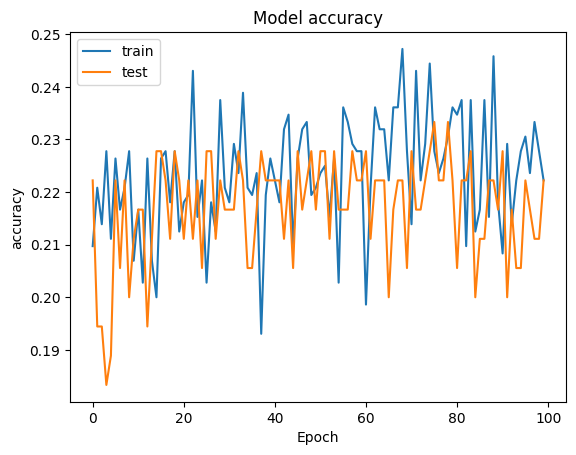

In [ ]:
plt.plot(history_reg.history['accuracy'])
plt.plot(history_reg.history['val_'+'accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

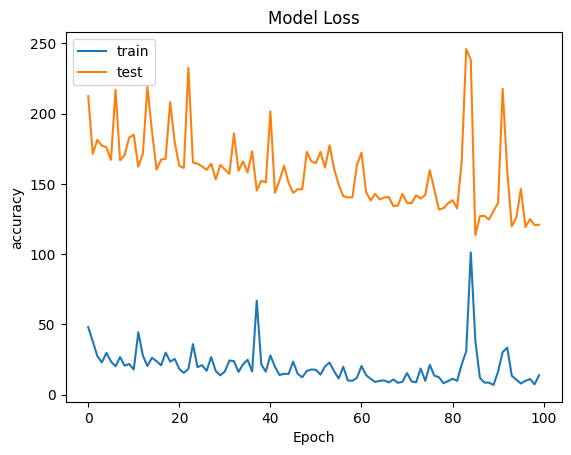

In [ ]:
plt.plot(history_reg.history['loss'])
plt.plot(history_reg.history['val_'+'loss'])
plt.title('Model Loss')
plt.ylabel('accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##### Train Predictions





In [ ]:
y_predict_train = reg_model.predict(X_train)
#y_predict_train

23/23 [==============================] - 1s 46ms/step


In [ ]:
for i,v in enumerate(y_predict_train):

    y_predict_train[i][0]=round(y_predict_train[i][0])

    if y_predict_train[i][0]<1:
        y_predict_train[i][0]=1

    elif y_predict_train[i][0] > 6:
        y_predict_train[i][0] = 6

    elif y_predict_train[i][0]  ==5:
        y_predict_train[i][0]=6

In [ ]:
mean_squared_error(y_predict_train, y_train)

3.0

In [ ]:
print(classification_report(y_predict_train, y_train))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.20      0.33       720
         2.0       0.00      0.00      0.00         0
         3.0       0.00      0.00      0.00         0
         4.0       0.00      0.00      0.00         0

    accuracy                           0.20       720
   macro avg       0.20      0.04      0.07       720
weighted avg       1.00      0.20      0.33       720



C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

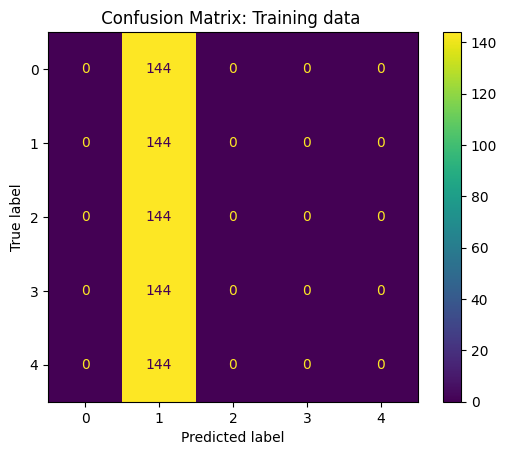

In [ ]:
cm_train = confusion_matrix(y_train, y_predict_train)
display = ConfusionMatrixDisplay(cm_train).plot()
plt.title(" Confusion Matrix: Training data  ")
plt.show()

In [ ]:
reg_score_tr = reg_model.evaluate(X_train,y_train)
print('Training Loss: %.2f' % (reg_score_tr[0]))
print('Training Accuracy: %.2f' % (reg_score_tr[1] * 100))

23/23 [==============================] - 1s 37ms/step - loss: 5.8643 - accuracy: 0.2000
Training Loss: 5.86
Training Accuracy: 20.00


##### Validation Predictions





In [ ]:
y_val_predict = reg_model.predict(X_valid)
#y_val_predict

6/6 [==============================] - 0s 35ms/step


In [ ]:
for i,v in enumerate(y_val_predict):
    y_val_predict[i][0]=round(y_val_predict[i][0])

    if y_val_predict[i][0]<1:
        y_val_predict[i][0]=1

    elif y_val_predict[i][0] > 6:
       y_val_predict[i][0] = 6

    elif y_val_predict[i][0]  ==5:
        y_val_predict[i][0]=6

In [ ]:
mean_squared_error(y_val_predict, y_valid)

3.0

In [ ]:
print(classification_report(y_val_predict ,y_valid))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.20      0.33       180
         2.0       0.00      0.00      0.00         0
         3.0       0.00      0.00      0.00         0
         4.0       0.00      0.00      0.00         0

    accuracy                           0.20       180
   macro avg       0.20      0.04      0.07       180
weighted avg       1.00      0.20      0.33       180



C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

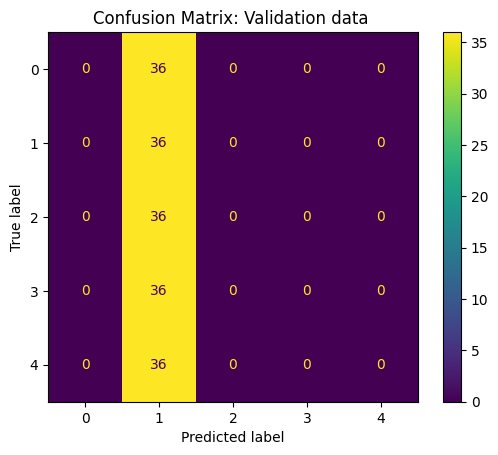

In [ ]:
cm_valid = confusion_matrix(y_valid, y_val_predict)
display = ConfusionMatrixDisplay(cm_valid).plot()
plt.title("Confusion Matrix: Validation data ")
plt.show()

In [ ]:
reg_score_val = reg_model.evaluate(X_valid,y_valid)
print('Validation Loss: %.2f' % (reg_score_val[0]))
print('Validation Accuracy: %.2f' % (reg_score_val[1] * 100))

6/6 [==============================] - 0s 36ms/step - loss: 5.8761 - accuracy: 0.2000
Validation Loss: 5.88
Validation Accuracy: 20.00


##### Test Predictions





In [ ]:
y_predict_test = reg_model.predict(X_test)
#y_predict_test

4/4 [==============================] - 0s 81ms/step


In [ ]:
for i,v in enumerate(y_predict_test):
    y_predict_test[i][0]=round(y_predict_test[i][0])

    if y_predict_test[i][0]<1:
        y_predict_test[i][0]=1

    elif y_predict_test[i][0] > 6:
        y_predict_test[i][0] = 6

    elif y_predict_test[i][0]  ==5:
        y_predict_test[i][0]=6

In [ ]:
mean_squared_error(y_predict_test, y_test)

3.0

In [ ]:
print(classification_report(y_predict_test, y_test))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       1.00      0.20      0.33       100
         2.0       0.00      0.00      0.00         0
         3.0       0.00      0.00      0.00         0
         4.0       0.00      0.00      0.00         0

    accuracy                           0.20       100
   macro avg       0.20      0.04      0.07       100
weighted avg       1.00      0.20      0.33       100



C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

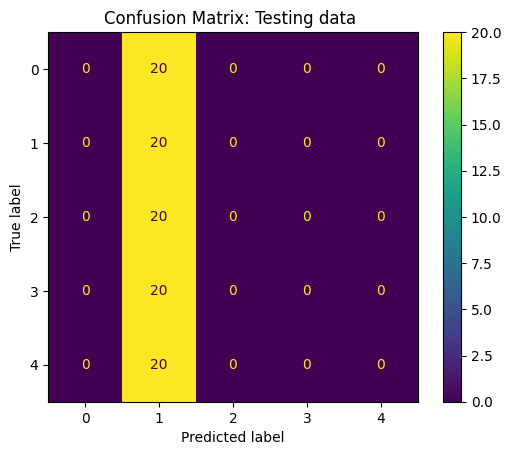

In [ ]:
cm_test = confusion_matrix(y_test, y_predict_test)
display = ConfusionMatrixDisplay(cm_test).plot()
plt.title("Confusion Matrix: Testing data ")
plt.show()

In [ ]:
reg_score_ts = reg_model.evaluate(X_test,y_test)
print('Testing Loss: %.2f' % (reg_score_ts[0]))
print('Testing Accuracy: %.2f' % (reg_score_ts[1] * 100))

4/4 [==============================] - 0s 29ms/step - loss: 5.8086 - accuracy: 0.2000
Testing Loss: 5.81
Testing Accuracy: 20.00


## Part 2. Improve your Model 

Regularization and data augmentation are common strategies to deal with small datasets.

### Step 1 (1.5)
 will provide the following:
- A loss curve for training and validation data
- An accuracy curve for training and validation data
- A confusion matrix of your network on the training including validation and testing data sets.
 

### Step 2 (1.5)
Train the same model from Step 1, now using data augmentation. Again, please provide the same output metrics as in Step 1.

### Step 3 (1)
Discuss based on your learning curves and final metrics in Step 2, how large a improvement can be observed from regularization and data augmentation.

### Step 1

##### a) Regularization

In [ ]:
optim_1 = tf.keras.optimizers.Adam(learning_rate=0.001)
n_classes = 5

In [ ]:
vgg_model = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(128, 128, 3))

for layer in vgg_model.layers:
    layer.trainable = False

In [ ]:
#Using the first 2 blocks of VGG-16
Block2_gg16 = vgg_model.layers[6].output
Block2_gg16

<KerasTensor: shape=(None, 32, 32, 128) dtype=float32 (created by layer 'block2_pool')>

In [ ]:
vgg_model_transfer = vgg_model.layers[6].output
#layer1
vgg_model_transfer = Conv2D(512, kernel_size=5, activation='relu', padding='same')(vgg_model_transfer)
vgg_model_transfer = MaxPooling2D(pool_size=(2, 2))(vgg_model_transfer)
#layer2
vgg_model_transfer = Conv2D(256, kernel_size=3, activation='relu', padding='same')(vgg_model_transfer)
vgg_model_transfer = MaxPooling2D(pool_size=(2, 2))(vgg_model_transfer)
#layer3
vgg_model_transfer = Conv2D(128, kernel_size=3, activation='relu', padding='same')(vgg_model_transfer)
vgg_model_transfer = MaxPooling2D(pool_size=(2, 2))(vgg_model_transfer)
#layer4
vgg_model_transfer = Conv2D(64, kernel_size=3, activation='relu', padding='same')(vgg_model_transfer)
vgg_model_transfer = MaxPooling2D(pool_size=(2, 2))(vgg_model_transfer)

In [ ]:
vgg_model_transfer = Flatten(name="flatten")(vgg_model_transfer)

In [ ]:
vgg_model_transfer = Dense(128, activation='relu')(vgg_model_transfer)
vgg_model_transfer=Dropout(0.2)(vgg_model_transfer)
vgg_model_transfer=BatchNormalization()(vgg_model_transfer)

In [ ]:
vgg_model_transfer = Dense(64, activation='relu')(vgg_model_transfer)
vgg_model_transfer=Dropout(0.2)(vgg_model_transfer)
vgg_model_transfer=BatchNormalization()(vgg_model_transfer)

In [ ]:
output_layer = Dense(5, activation='softmax')(vgg_model_transfer)

In [ ]:
regularized_model = Model(inputs=vgg_model.input, outputs=output_layer)

In [ ]:
regularized_model.compile(loss='sparse_categorical_crossentropy', optimizer=optim_1,
              metrics=['accuracy'])

In [ ]:
vgg_reg_history = regularized_model.fit(X_train,y_train, epochs=100, batch_size=32, verbose=1, validation_data=(X_valid,y_valid))

Epoch 1/100
23/23 [==============================] - 3s 86ms/step - loss: 2.1802 - accuracy: 0.2056 - val_loss: 5.3633 - val_accuracy: 0.2000
Epoch 2/100
23/23 [==============================] - 2s 78ms/step - loss: 2.0498 - accuracy: 0.2000 - val_loss: 3.0990 - val_accuracy: 0.1944
Epoch 3/100
23/23 [==============================] - 2s 77ms/step - loss: 1.9430 - accuracy: 0.2097 - val_loss: 1.9057 - val_accuracy: 0.1944
Epoch 4/100
23/23 [==============================] - 2s 77ms/step - loss: 1.9148 - accuracy: 0.1986 - val_loss: 1.7277 - val_accuracy: 0.1944
Epoch 5/100
23/23 [==============================] - 2s 77ms/step - loss: 1.9088 - accuracy: 0.1847 - val_loss: 1.7164 - val_accuracy: 0.1611
Epoch 6/100
23/23 [==============================] - 2s 78ms/step - loss: 1.8506 - accuracy: 0.1958 - val_loss: 1.6554 - val_accuracy: 0.2167
Epoch 7/100
23/23 [==============================] - 2s 77ms/step - loss: 1.8569 - accuracy: 0.1847 - val_loss: 1.6537 - val_accuracy: 0.1889
Epoch 

In [ ]:
regularized_model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

###### Model Loss and Accuracy

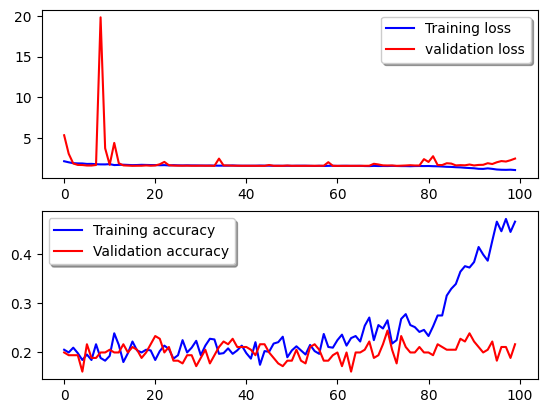

In [ ]:
fig, ax = plt.subplots(2,1)
ax[0].plot(vgg_reg_history.history['loss'], color='b', label="Training loss")
ax[0].plot(vgg_reg_history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(vgg_reg_history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(vgg_reg_history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [ ]:
score = regularized_model.evaluate(X_train,y_train)
print('Training Loss: %.2f' % (score[0]))
print('Training Accuracy: %.2f' % (score[1] * 100))

23/23 [==============================] - 1s 38ms/step - loss: 0.9843 - accuracy: 0.5528
Loss: 0.98
Accuracy: 55.28


In [ ]:
score_ts = regularized_model.evaluate(X_test,y_test)
print('Testing Loss: %.2f' % (score_ts[0]))
print('Testing Accuracy: %.2f' % (score_ts[1] * 100))

4/4 [==============================] - 0s 29ms/step - loss: 2.2327 - accuracy: 0.1800
Testing Loss: 2.23
Testing Accuracy: 18.00


###### Training

In [ ]:
vgg_tr_preds = regularized_model.predict(X_train)
vgg_train_classes = np.argmax(vgg_tr_preds, axis=1)
#vgg_train_classes

23/23 [==============================] - 1s 37ms/step


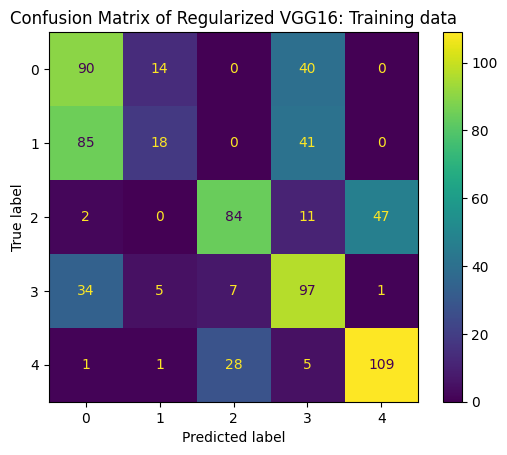

In [ ]:
cm_regu_train = confusion_matrix(y_train, vgg_train_classes)
display = ConfusionMatrixDisplay(cm_regu_train).plot()
plt.title("Confusion Matrix of Regularized VGG16: Training data")
plt.show()

In [ ]:
re_score_tr = reg_model.evaluate(X_train,y_train)
print('Training Loss: %.2f' % (re_score_tr[0]))
print('Training Accuracy: %.2f' % (re_score_tr[1] * 100))

23/23 [==============================] - 1s 38ms/step - loss: 5.8643 - accuracy: 0.2000
Training Loss: 5.86
Training Accuracy: 20.00


######Validation

In [ ]:
vgg_val_preds = regularized_model.predict(X_valid)
vgg_val_classes = np.argmax(vgg_val_preds, axis=1)
#vgg_val_classes

6/6 [==============================] - 0s 42ms/step


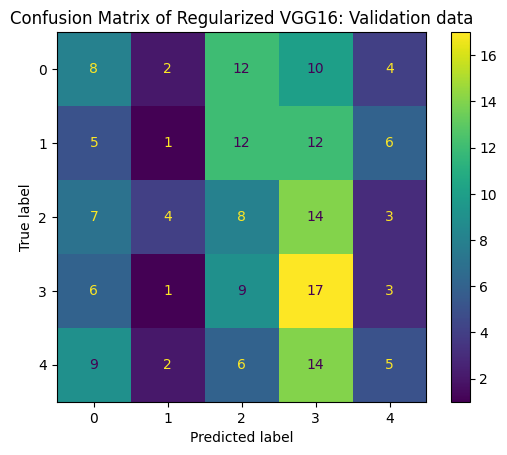

In [ ]:
cm_regu_val = confusion_matrix(y_valid, vgg_val_classes)
display = ConfusionMatrixDisplay(cm_regu_val).plot()
plt.title("Confusion Matrix of Regularized VGG16: Validation data")
plt.show()

###### Testing

In [ ]:
vgg_preds = regularized_model.predict(X_test)
vgg_pred_classes = np.argmax(vgg_preds, axis=1)
vgg_pred_classes

4/4 [==============================] - 0s 35ms/step


array([2, 3, 2, 2, 3, 2, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 2, 3,
       2, 0, 0, 1, 3, 1, 4, 3, 3, 3, 4, 3, 3, 3, 2, 2, 0, 3, 2, 3, 3, 3,
       0, 3, 0, 2, 3, 0, 4, 3, 4, 3, 4, 3, 3, 3, 0, 2, 2, 4, 3, 0, 4, 3,
       0, 0, 3, 2, 2, 2, 3, 2, 4, 3, 0, 2, 3, 2, 2, 3, 3, 2, 1, 0, 4, 3,
       3, 0, 2, 3, 3, 0, 2, 2, 3, 2, 2, 0], dtype=int64)

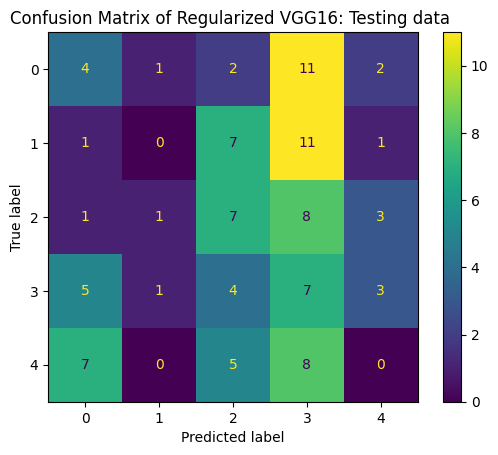

In [ ]:
cm_regu_test = confusion_matrix(y_test, vgg_pred_classes)
display = ConfusionMatrixDisplay(cm_regu_test).plot()
plt.title("Confusion Matrix of Regularized VGG16: Testing data ")
plt.show()

###Step 2

####Augmentation

In [ ]:
datagen = ImageDataGenerator(
      rescale=1./255,
      preprocessing_function=preprocess_input,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

In [ ]:
train_generator = datagen.flow_from_directory(
        train_path,
        # All images will be resized to 128*128
        target_size=(128, 128),
        batch_size=20,
        class_mode='sparse',shuffle=False)

Found 720 images belonging to 5 classes.


In [ ]:
val_generator=datagen.flow_from_directory(
        validate_path,
        # All images will be resized to 128*128
        target_size=(128, 128),
        batch_size=20,
        class_mode='sparse',shuffle=False)

Found 180 images belonging to 5 classes.


In [ ]:
#testing data should not be augmented!
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input,rescale=1./255)

In [ ]:
Testing_generator = test_gen.flow_from_directory(
        test_path,
        target_size=(128, 128),
        batch_size=20,
        class_mode='sparse',shuffle=False)

Found 100 images belonging to 5 classes.


#####Model

In [ ]:
optim_1 = tf.keras.optimizers.Adam(learning_rate=0.001)
n_classes = 5

In [ ]:
vgg_model = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(128, 128, 3))

for layer in vgg_model.layers:
    layer.trainable = False

In [ ]:
#Using the first 2 blocks of VGG-16
Block2_gg16 = vgg_model.layers[6].output
Block2_gg16

<KerasTensor: shape=(None, 32, 32, 128) dtype=float32 (created by layer 'block2_pool')>

In [ ]:
vgg_model_transfer = vgg_model.layers[6].output
#layer1
vgg_model_transfer = Conv2D(512, kernel_size=5, activation='relu', padding='same')(vgg_model_transfer)
vgg_model_transfer = MaxPooling2D(pool_size=(2, 2))(vgg_model_transfer)
#layer2
vgg_model_transfer = Conv2D(256, kernel_size=3, activation='relu', padding='same')(vgg_model_transfer)
vgg_model_transfer = MaxPooling2D(pool_size=(2, 2))(vgg_model_transfer)
#layer3
vgg_model_transfer = Conv2D(128, kernel_size=3, activation='relu', padding='same')(vgg_model_transfer)
vgg_model_transfer = MaxPooling2D(pool_size=(2, 2))(vgg_model_transfer)
#layer4
vgg_model_transfer = Conv2D(64, kernel_size=3, activation='relu', padding='same')(vgg_model_transfer)
vgg_model_transfer = MaxPooling2D(pool_size=(2, 2))(vgg_model_transfer)

In [ ]:
vgg_model_transfer = Flatten(name="flatten")(vgg_model_transfer)

In [ ]:
vgg_model_transfer = Dense(128, activation='relu')(vgg_model_transfer)
vgg_model_transfer=Dropout(0.2)(vgg_model_transfer)
vgg_model_transfer=BatchNormalization()(vgg_model_transfer)

In [ ]:
vgg_model_transfer = Dense(64, activation='relu')(vgg_model_transfer)
vgg_model_transfer=Dropout(0.2)(vgg_model_transfer)
vgg_model_transfer=BatchNormalization()(vgg_model_transfer)

In [ ]:
output_layer = Dense(5, activation='softmax')(vgg_model_transfer)

In [ ]:
augmented_model = Model(inputs=vgg_model.input, outputs=output_layer)

In [ ]:
augmented_model.compile(loss='sparse_categorical_crossentropy', optimizer=optim_1,
              metrics=['accuracy'])

In [ ]:
vgg_history = augmented_model.fit(train_generator, epochs=100, batch_size=32, verbose=1, validation_data=(val_generator))

Epoch 1/100
36/36 [==============================] - 7s 137ms/step - loss: 2.0541 - accuracy: 0.2139 - val_loss: 4.5285 - val_accuracy: 0.2056
Epoch 2/100
36/36 [==============================] - 4s 109ms/step - loss: 1.9345 - accuracy: 0.1764 - val_loss: 2.5522 - val_accuracy: 0.2000
Epoch 3/100
36/36 [==============================] - 4s 102ms/step - loss: 1.8342 - accuracy: 0.1917 - val_loss: 1.7888 - val_accuracy: 0.1944
Epoch 4/100
36/36 [==============================] - 4s 117ms/step - loss: 1.7879 - accuracy: 0.2208 - val_loss: 1.6830 - val_accuracy: 0.1944
Epoch 5/100
36/36 [==============================] - 5s 126ms/step - loss: 1.7549 - accuracy: 0.2028 - val_loss: 1.6421 - val_accuracy: 0.1889
Epoch 6/100
36/36 [==============================] - 4s 123ms/step - loss: 1.7267 - accuracy: 0.2042 - val_loss: 1.6242 - val_accuracy: 0.2056
Epoch 7/100
36/36 [==============================] - 4s 111ms/step - loss: 1.7058 - accuracy: 0.2000 - val_loss: 1.6312 - val_accuracy: 0.2111

In [ ]:
augmented_model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

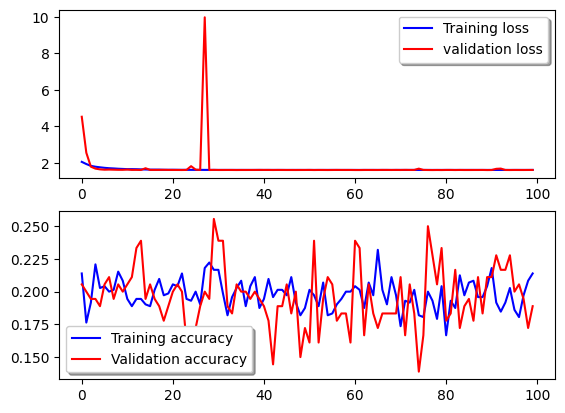

In [ ]:
fig, ax = plt.subplots(2,1)
ax[0].plot(vgg_history.history['loss'], color='b', label="Training loss")
ax[0].plot(vgg_history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(vgg_history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(vgg_history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [ ]:
aug_score_tst = augmented_model.evaluate(test_data)
print('Validation Loss: %.2f' % (aug_score_tst[0]))
print('Validation Accuracy: %.2f' % (aug_score_tst[1] * 100))

4/4 [==============================] - 0s 29ms/step - loss: 25.5784 - accuracy: 0.2000
Validation Loss: 25.58
Validation Accuracy: 20.00


In [ ]:
aug_score_tr = augmented_model.evaluate(train_generator)
print('Training Loss: %.2f' % (aug_score_tr[0]))
print('Training Accuracy: %.2f' % (aug_score_tr[1] * 100))

36/36 [==============================] - 3s 81ms/step - loss: 1.6112 - accuracy: 0.1972
Training Loss: 1.61
Training Accuracy: 19.72


###### Training

In [ ]:
tr_true_classes = train_generator.classes

In [ ]:
aug_tr_preds = augmented_model.predict(X_train)
aug_train_classes = np.argmax(aug_tr_preds, axis=1)

23/23 [==============================] - 1s 37ms/step


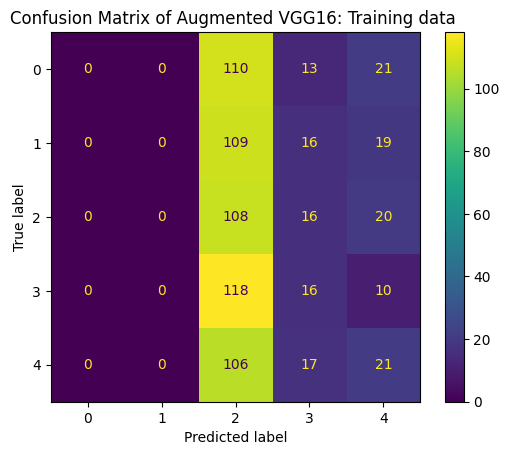

In [ ]:
cm_aug_train = confusion_matrix(y_train, aug_train_classes)
display = ConfusionMatrixDisplay(cm_aug_train).plot()
plt.title("Confusion Matrix of Augmented VGG16: Training data ")
plt.show()

In [ ]:
aug_train_acc = accuracy_score(y_train, aug_train_classes)
print("Augmanted VGG16 Model Training Accuracy: {:.2f}%".format(aug_train_acc * 100))

Augmanted VGG16 Model Training Accuracy: 20.14%


######Validation

In [ ]:
val_true_classes=val_generator.classes

In [ ]:
aug_val_preds = augmented_model.predict(X_valid)
aug_val_classes = np.argmax(aug_val_preds, axis=1)


6/6 [==============================] - 0s 35ms/step


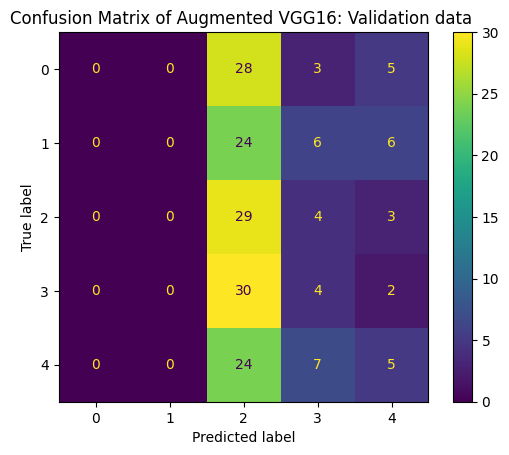

In [ ]:
cm_aug_val = confusion_matrix(y_valid, aug_val_classes)
display = ConfusionMatrixDisplay(cm_aug_val).plot()
plt.title("Confusion Matrix of Augmented VGG16: Validation data ")
plt.show()

In [ ]:
aug_val_acc = accuracy_score(y_valid, aug_val_classes)
print("Augmanted VGG16 Model Validation Accuracy: {:.2f}%".format(aug_val_acc * 100))

Augmanted VGG16 Model Validation Accuracy: 21.11%


###### Testing

In [ ]:
tst_true_classes=Testing_generator.classes

In [ ]:
aug_tst_preds = augmented_model.predict(X_test)
aug_tst_classes = np.argmax(aug_tst_preds, axis=1)

4/4 [==============================] - 0s 35ms/step


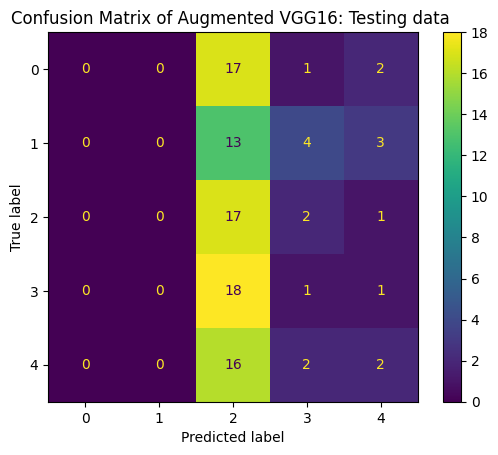

In [ ]:
cm_aug_test = confusion_matrix(y_test, aug_tst_classes)
display = ConfusionMatrixDisplay(cm_aug_test).plot()
plt.title("Confusion Matrix of Augmented VGG16: Testing data ")
plt.show()

In [ ]:
aug_test_acc = accuracy_score(y_test, aug_tst_classes)
print(" Testing Accuracy of Augmanted VGG16 Model: {:.2f}%".format(aug_test_acc * 100))

 Testing Accuracy of Augmanted VGG16 Model: 20.00%
